<a href="https://colab.research.google.com/github/Bennath-coder/Bennath-coder/blob/main/S6_007P_a%CC%80_009P_Exercices_Classification_d'images_avec_Keras_E%CC%81nonce%CC%81_vNPz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install tensorflow==2.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 133.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver d

In [2]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 : Charger, préparer et visualiser les données

Dans cet exercice, nous allons récupérer les données provenant du dataset Fashion MNIST contenant 60 000 images en noir et blanc représentant des articles de mode.

In [3]:
from keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

1.1. Combien y a t-il de données dans le jeu d'entraînement et dans le jeu de test ?

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Notre dataset contient 60 000 images dans le jeu d'entraînement et 10 000 images dans le jeu de test.

1.2. Combien de pixels comporte une image ?

In [13]:
first_image = X_train[0]
print(first_image.shape)
print(first_image.shape[0] * first_image.shape[1])

(28, 28)
784


Notons qu'une image est représenté en 1 dimension :

- 28 pixels de largeur
- 28 pixels de hauteur
- 1 canal (une image en noir et blanc ne contient qu'un seul canal représentant des nuances de gris)
- 784 pixels au total (28 * 28 dans 1 image)

1.3. Afficher les 9 premières images du dataset ainsi que leurs classes.

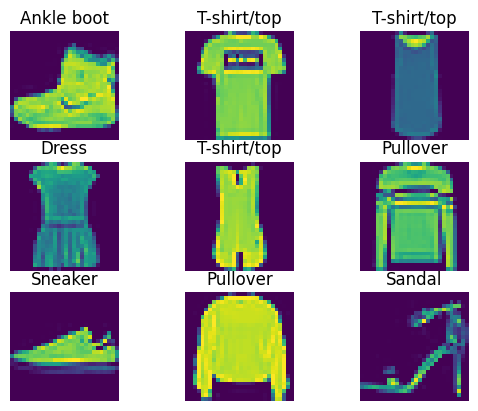

In [14]:
for idx, image in enumerate(X_train[:9]):
  plt.subplot(3, 3, idx+1)
  plt.imshow(image)
  plt.title(class_names[y_train[idx]])
  plt.axis('off')

1.4. Normaliser les données pour que les valeurs des pixels se situent entre 0 et 1.

In [9]:
print(X_train.min())
print(X_train.max())

0
255


Les valeurs des pixels des images sont comprises entre 0 et 255. Nous allons normaliser ces valeurs pour qu'elles soient comprises entre 0 et 1.

Cela permet de rendre l'entraînement plus uniforme et donc d'améliorer les performances de notre futur modèle.

In [10]:
X_test_normalize = X_test / 255
print(X_test_normalize.min())
print(X_test_normalize.max())

X_train_normalize = X_train / 255
print(X_train_normalize.min())
print(X_train_normalize.max())

0.0
1.0
0.0
1.0


## Exercice 2 : Créer le modèle

Créer un modèle avec les caractéristiques suivantes :    
- Une couche d'Input avec une shape (28, 28, 1)
- Une couche de convolution comportant 64 filtres, un kernel size de 3 et une fonction d'activation relu
- Une couche de MaxPooling avec un pool size de 2*2
- Une couche Flatten pour mettre les données sur une seule dimension
- Une couche Dense contenant 64 neurones et fonction d'activation relu
- Une couche de sortie contenant le bon nombre de neurones et la bonne fonction d'activation

Puis afficher le résumé du modèle.

In [18]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(input_shape),
        keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'), # Couche de convolution
        keras.layers.MaxPooling2D(pool_size=(2, 2)), # Couche allant de pair avec la convolution
        keras.layers.Flatten(), # Permet de remettre les paramètres sur 1 dimension afin d'êtres traités par la couche dense
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ]
)

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         692,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,578 (2.65 MB)

 Trainable params: 693,578 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

## Exercice 3 : Entraînement du modèle

3.1. Compiler le modèle avec un optimizer adam et la métrique réglé sur l'accuracy.
Choisir la `loss` qui convient.

In [21]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

Labels sous forme d'entiers = sparse_categorical_crossentropy

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # les labels sont sous forme d'entiers et non de vecteurs one-hot
    metrics=['accuracy']
)

3.2. Entraîner le modèle durant 20 epochs avec un batch size de 512 (à potentiellement baisser si vous travaillez sans GPU).

Sauvegarder l'historique d'entraînement dans une variable history.

In [23]:
history = model.fit(X_train_normalize, y_train, batch_size=512, epochs=20, validation_data=(X_test_normalize, y_test))

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 44s 364ms/step - accuracy: 0.6792 - loss: 0.9453 - val_accuracy: 0.8534 - val_loss: 0.4163
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 349ms/step - accuracy: 0.8706 - loss: 0.3752 - val_accuracy: 0.8789 - val_loss: 0.3464
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 83s 361ms/step - accuracy: 0.8900 - loss: 0.3200 - val_accuracy: 0.8865 - val_loss: 0.3177
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 81s 355ms/step - accuracy: 0.8989 - loss: 0.2860 - val_accuracy: 0.8910 - val_loss: 0.3041
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 355ms/step - accuracy: 0.9051 - loss: 0.2701 - val_accuracy: 0.8872 - val_loss: 0.3134
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 356ms/step - accuracy: 0.9066 - loss: 0.2587 - val_accuracy: 0.8976 - val_loss: 0.2862
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 355ms/step - accuracy: 0.9173 - loss: 0.2305 - val_accuracy: 0.9004 - val_loss: 0.2787
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 81s 351ms/step - accuracy: 0.9218 - loss: 0

## Exercice 4 : Evaluer le modèle

4.1. Afficher l'historique d'apprentissage du modèle.

In [24]:
def history_plot(history):
    fig = plt.figure(figsize=(11, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train accuracy')
    plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
    plt.title('Accuracy evolution')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label = 'train loss')
    plt.plot(history.history['val_loss'], label = 'validation loss')
    plt.title('Loss evolution')
    plt.ylabel('loss')
    plt.xlabel('epochs')

    plt.legend()

    plt.show()

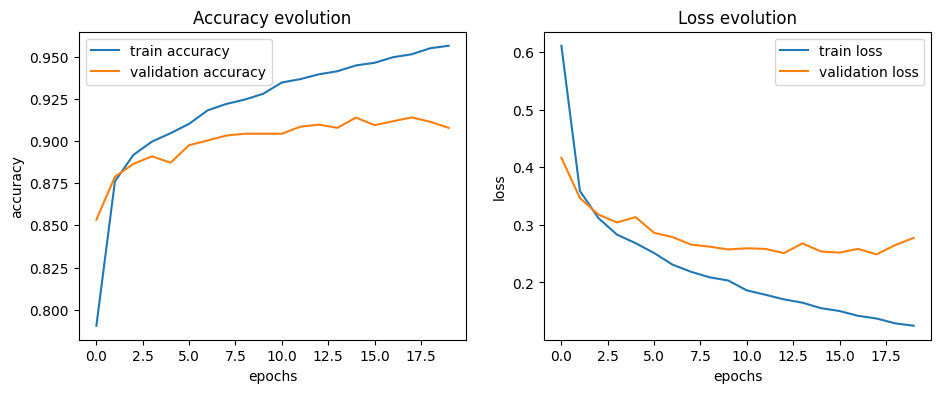

In [25]:
history_plot(history)

4.2. Afficher le classification report.

In [26]:
predictions = model.predict(X_test_normalize)
pred_labels = np.array([np.argmax(x) for x in predictions]).reshape(-1, 1)

print(pred_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[9]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.91      0.80      0.85      1000
           3       0.95      0.88      0.91      1000
           4       0.76      0.95      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.68      0.73      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



4.3. Afficher la matrice de confusion.

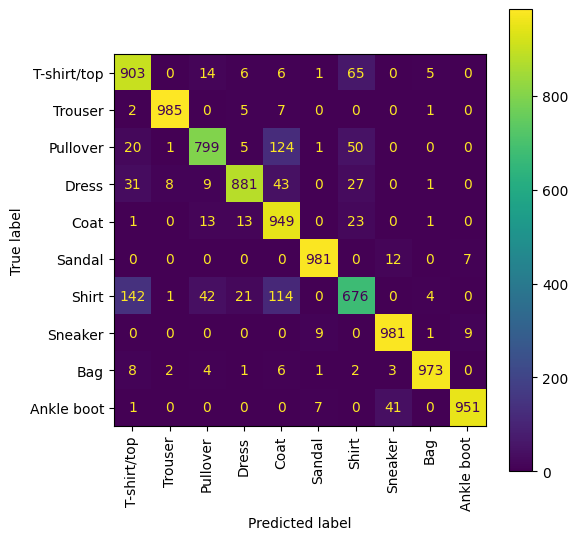

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, pred_labels, display_labels=class_names, ax=ax, xticks_rotation="vertical")
plt.show()